In [66]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


class Directed_Sandpile:
    def __init__(self, longitudinal_size, transverse_size):
        self.longitudinal_size = longitudinal_size
        self.transverse_size = transverse_size
        self.grid = np.zeros(longitudinal_size * transverse_size)        
        size = longitudinal_size * transverse_size
        self.toppling_matrix = np.zeros((size, size), dtype=int)
        np.fill_diagonal(self.toppling_matrix, 2)        
        
        # Set -1 for the downward neighbor (next row in the same column)
        row_indices = np.arange(size - transverse_size)  # Exclude the last row
        downward_indices = row_indices + transverse_size
        #self.toppling_matrix[row_indices, downward_indices] = -1
        
        # Set -1 for the rightward periodic neighbor of the downward neighbor
        rightward_indices = (downward_indices + 1) % self.transverse_size \
                            + (downward_indices // self.transverse_size) * self.transverse_size
        rightward_indices = np.where(
            (downward_indices % self.transverse_size) != (self.transverse_size - 1), 
            downward_indices + 1, 
            downward_indices - (self.transverse_size - 1)
        )
        self.toppling_matrix[row_indices, rightward_indices] = -1

        # Set -1 for the leftward periodic neighbor of the downward neighbor
        leftward_indices = (downward_indices - 1) % self.transverse_size \
                           + (downward_indices // self.transverse_size) * self.transverse_size
        leftward_indices = np.where(
            (downward_indices % self.transverse_size) != 0, 
            downward_indices - 1, 
            downward_indices + (self.transverse_size - 1)
        )
        self.toppling_matrix[row_indices, leftward_indices] = -1

    def grid_plotter(self):
        return self.grid.reshape((self.longitudinal_size, self.transverse_size))

    def add_grain(self, x, y):
        """Add a grain of sand to the grid at position (x, y)."""
        index = x * self.transverse_size + y
        self.grid[index] += 1

    def topple(self):
        """Perform toppling until the grid stabilizes."""
        while np.any(self.grid > 1):
            unstable_indices = np.where(self.grid >= 1)[0]  # Get indices where height >= 3
            for idx in unstable_indices:
                self.grid -= self.toppling_matrix[idx]  # Apply toppling rule
            print(unstable_indices)


0
0
0
0
0
0
0
0
0
0
2
2
2
2
2


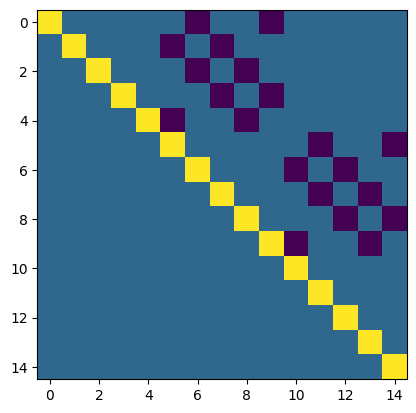

In [71]:
a = Directed_Sandpile(3,5)
plt.imshow(a.toppling_matrix)
for i in a.toppling_matrix:
    print(i.sum())

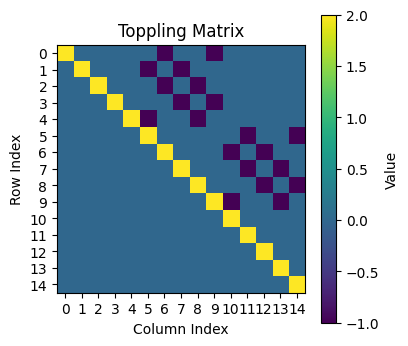

In [72]:
import matplotlib.pyplot as plt

# Assuming `a.toppling_matrix` exists and is the matrix to visualize
plt.figure(figsize=(4, 4))
plt.imshow(a.toppling_matrix, cmap="viridis", origin="upper")
plt.colorbar(label="Value")

# Set ticks at each unit
size = a.toppling_matrix.shape[0]
plt.xticks(ticks=np.arange(size), labels=np.arange(size))
plt.yticks(ticks=np.arange(size), labels=np.arange(size))

plt.title("Toppling Matrix")
plt.xlabel("Column Index")
plt.ylabel("Row Index")
plt.grid(False)  # Optional: Turn off grid lines for a cleaner look
plt.show()


In [70]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Assuming the Directed_Sandpile class is already defined
sandpile = Directed_Sandpile(20, 300)
num_grains = 1000# Adjust for desired number of frames
coordinates = [[0, random.randint(0, sandpile.transverse_size - 1)] for _ in range(num_grains)]

# Create directory to save frames
output_dir = "sandpile_frames"
os.makedirs(output_dir, exist_ok=True)

# Generate and save frames
for i, (x, y) in enumerate(tqdm(coordinates, desc="Simulating Sandpile")):
    sandpile.add_grain(x, y)
    sandpile.topple()
    
    # Save the frame
    plt.imshow(sandpile.grid_plotter(), cmap="viridis", origin="upper")
    plt.title(f"Directed Sandpile (Step {i+1})")
    plt.colorbar(label="Height")
    plt.savefig(f"{output_dir}/frame_{i:04d}.png")
    plt.close()

print(f"All frames saved to directory: {output_dir}")


Simulating Sandpile:   0%|          | 0/1000 [00:00<?, ?it/s]

Simulating Sandpile:   3%|▎         | 29/1000 [00:04<02:07,  7.59it/s]

[  6  10  22  42  58  85  99 103 104 109 118 120 122 128 139 177 201 208
 210 213 217 231 240 246 268 287 293 294]
[305 307 309 311 321 323 341 343 357 359 384 386 398 400 402 403 404 405
 408 410 417 419 421 423 427 429 438 440 476 478 500 502 507 509 511 512
 514 516 518 530 532 539 541 545 547 567 569 586 588 592 593 594 595]
[604 606 608 610 612 620 622 624 640 642 644 656 658 660 683 685 687 697
 699 701 702 703 704 705 706 707 709 711 716 718 720 722 724 726 728 730
 737 739 741 775 777 779 799 801 803 806 808 810 811 812 813 815 817 819
 829 831 833 838 840 842 844 846 848 866 868 870 885 887 889 891 892 893
 894 895 896]
[ 903  905  907  909  911  913  919  921  923  925  939  941  943  945
  955  957  959  961  982  984  986  988  996  998 1000 1001 1002 1003
 1004 1005 1006 1007 1008 1010 1012 1015 1017 1019 1021 1023 1025 1027
 1029 1031 1036 1038 1040 1042 1074 1076 1078 1080 1098 1100 1102 1104
 1105 1107 1109 1110 1111 1112 1113 1114 1116 1118 1120 1128 1130 1132
 1134 11

Simulating Sandpile:   5%|▌         | 50/1000 [00:06<02:12,  7.19it/s]

[ 48  50  59  67  70  98 102 129 133 158 168 174 184 186 198 219 225 227
 250 262]
[347 349 351 358 360 366 368 369 371 397 399 401 428 430 432 434 457 459
 467 469 473 475 483 485 487 497 499 520 524 526 528 549 551 561 563]
[646 648 650 652 657 659 661 665 667 668 669 670 672 696 698 700 727 729
 731 733 735 756 758 760 766 768 770 772 774 776 782 784 786 788 796 798
 800 821 823 825 827 850 852 860 862 864]
[ 947  949  951  953  956  958  960  962  964  966  967  968  969  970
  971  973  995  997  999 1026 1028 1030 1032 1034 1055 1057 1059 1061
 1065 1067 1069 1071 1073 1075 1077 1081 1083 1085 1087 1089 1095 1097
 1099 1101 1122 1124 1126 1151 1153 1159 1161 1163]
[1248 1250 1252 1255 1257 1259 1261 1263 1265 1266 1267 1268 1269 1270
 1271 1272 1274 1294 1296 1298 1325 1327 1329 1331 1333 1354 1356 1358
 1360 1362 1364 1366 1368 1370 1372 1374 1376 1378 1380 1382 1384 1386
 1388 1390 1394 1396 1398 1400 1402 1423 1425 1452 1454 1458 1460 1462]
[1549 1551 1554 1556 1558 1560 1562 

Simulating Sandpile:   8%|▊         | 80/1000 [00:11<01:58,  7.77it/s]

[  8   9  26  41  51  63  65  76  79  84  90 119 136 141 151 153 167 180
 181 215 232 244 267 272]
[308 310 325 327 340 342 350 352 362 364 375 377 378 380 383 385 389 391
 418 420 435 437 442 450 452 454 466 468 479 480 481 482 531 533 543 566
 568 571 573]
[607 609 611 626 628 639 641 643 649 651 653 663 674 676 677 678 679 681
 682 684 686 688 690 692 717 719 721 734 736 738 743 749 751 753 755 765
 767 769 778 780 781 783 830 832 834 865 867 869 872 874]
[ 906  908  910  912  927  929  938  940  942  944  948  950  952  954
  975  976  977  978  979  980  981  983  985  987  989  991  993 1016
 1018 1020 1022 1033 1035 1037 1039 1044 1048 1050 1052 1054 1056 1064
 1066 1068 1070 1079 1082 1084 1129 1131 1133 1135 1164 1166 1168 1170
 1173 1175]
[1205 1207 1209 1211 1213 1228 1230 1237 1239 1241 1243 1245 1247 1249
 1251 1253 1275 1276 1277 1278 1279 1280 1282 1284 1286 1288 1290 1292
 1315 1317 1319 1321 1323 1334 1336 1338 1340 1345 1347 1349 1351 1353
 1355 1357 1363 1365 1367 13

Simulating Sandpile:  12%|█▏        | 121/1000 [00:17<02:19,  6.31it/s]

[  3   4   5   7  11  29  33  38  43  50  74  95 102 107 114 121 127 145
 157 172 175 213 214 224 230 245 247 251 255 279 286 299]
[300 302 303 304 306 312 328 330 332 334 337 339 344 349 373 394 396 403
 406 413 415 422 426 444 446 456 458 471 474 513 514 515 523 525 529 544
 546 548 550 552 554 556 578 580 585 587 598]
[601 602 603 605 613 627 629 631 633 635 636 638 645 648 650 693 695 702
 704 712 714 723 725 745 747 757 759 773 813 814 815 816 822 824 826 828
 843 845 847 849 851 853 855 857 877 879 881 884 886 888 897 899]
[ 900  901  902  904  914  926  928  930  932  934  935  936  937  946
  947  949  951  992  994 1001 1003 1005 1011 1013 1024 1046 1058 1060
 1072 1112 1114 1115 1116 1117 1121 1123 1125 1127 1142 1144 1146 1148
 1150 1152 1154 1156 1158 1176 1178 1180 1182 1183 1185 1187 1189 1198]
[1200 1201 1203 1215 1225 1227 1229 1231 1233 1234 1235 1236 1246 1248
 1250 1252 1291 1293 1300 1302 1304 1306 1310 1312 1359 1361 1411 1413
 1415 1416 1417 1418 1420 1422 1424 14

Simulating Sandpile:  14%|█▍        | 138/1000 [00:19<01:54,  7.52it/s]

[  0  19  78 118 158 169 170 206 216 260]


Simulating Sandpile:  19%|█▊        | 186/1000 [00:26<01:58,  6.89it/s]

[ 27  28  60  65  73  75  93 117 120 132 134 135 146 165 167 170 174 182
 183 190 193 196 197 213 270 272 275 280 289 292 295 301 318 320 379 419
 470 505 517 559 599]
[326 329 361 364 366 372 374 376 392 416 421 431 433 436 445 447 464 466
 468 469 471 473 484 489 491 492 494 495 496 498 512 571 574 576 579 581
 590 591 596 600 617 619 621 680 718 720 771 804 818 858 898]
[ 625  630  662  663  665  667  671  673  675  691  715  722  732  744
  746  748  763  765  767  768  769  770  772  774  785  790  791  792
  793  794  795  797  870  872  873  875  878  880  882  890  916  918
  920  922 1017 1019 1021 1103 1119 1157 1199]
[ 924  931  962  963  964  966  968  972  974  990 1014 1023 1043 1045
 1047 1049 1062 1064 1066 1067 1068 1069 1070 1071 1073 1075 1086 1090
 1091 1092 1093 1094 1096 1169 1171 1172 1173 1174 1177 1179 1181 1217
 1219 1221 1223 1316 1318 1320 1322 1456]
[1232 1261 1263 1264 1265 1267 1269 1273 1324 1342 1344 1346 1348 1350
 1363 1365 1366 1367 1368 1369 1370 13

Simulating Sandpile:  22%|██▏       | 215/1000 [00:29<01:39,  7.90it/s]

[  6  12  36  81  82 126 128 142 152 155 177 191 200 243 244 248 249 257
 286]


Simulating Sandpile:  23%|██▎       | 229/1000 [00:31<01:38,  7.80it/s]

[ 10  53 108 133 150 161 179 215 305 307 313 335 381 382 425 427 441 443
 451 453 476 490 501 542 545 558]
[309 311 354 407 409 434 449 460 462 478 514 516 604 606 608 614 634 726
 728 740 742 750 752 754 775 777 789 802 841 844 846 859]
[ 610  612  655  708  710  733  735  761  779  813  815  817  903  905
  907  909  915  933 1025 1027 1029 1041 1051 1053 1074 1076 1078 1088
 1140 1143 1145 1147 1160]
[ 911  913 1009 1032 1034 1036 1080 1114 1116 1118 1202 1204 1206 1208
 1210 1216 1326 1328 1330 1352 1373 1375 1377 1379 1439 1442 1444 1446
 1448 1461]
[1212 1214 1331 1333 1335 1337 1381 1413 1415 1417 1419 1501 1503 1505
 1507 1509 1511 1627 1629 1631 1674 1676 1678 1680 1738 1741 1743 1745
 1747 1749]
[1513 1515 1630 1632 1634 1636 1638 1682 1712 1714 1716 1718 1720 1800
 1802 1804 1806 1808 1810 1812 1928 1930 1932 1975 1977 1979 1981 2040
 2042 2044 2046 2048 2050]
[1814 1816 1929 1931 1933 1935 1937 1939 1983 2011 2013 2015 2017 2019
 2021 2101 2103 2105 2107 2109 2111 2113 2229

Simulating Sandpile:  27%|██▋       | 267/1000 [00:37<01:35,  7.69it/s]

[ 10  11  13  18  30  85  91  97 101 121 154 160 189 221 230 233 238 253
 278 294 296]


Simulating Sandpile:  30%|██▉       | 298/1000 [00:44<04:19,  2.71it/s]

[  4   7  34  39  40  57  62  78  88 163 164 174 187 199 203 218 232 234
 237 269 286 310 312 314 317 319 331 390 420 455 459 461 488 522 531 534
 537 577 593 595 597]
[306 308 333 338 356 363 377 387 463 465 475 486 504 519 533 535 536 538
 570 585 587 609 611 613 615 616 618 632 689 719 721 758 760 762 787 830
 832 835 836 876 892 894 896]
[ 605  607  637  664  676  678  764  805  820  834  837  839  871  886
  908  910  912  914  917 1018 1020 1022 1057 1059 1061 1063 1129 1131
 1133 1136 1191 1193 1195 1197]
[ 904  906  965  975  977  979 1106 1135 1138 1185 1187 1207 1209 1211
 1213 1215 1317 1319 1321 1323 1356 1358 1360 1362 1428 1430 1432 1434
 1437 1490 1492 1494 1496 1498]
[1203 1205 1274 1276 1278 1280 1407 1436 1484 1486 1488 1506 1508 1510
 1512 1514 1516 1616 1618 1620 1622 1624 1655 1657 1659 1661 1663 1727
 1729 1731 1733 1735 1789 1791 1793 1795 1797 1799]
[1502 1504 1573 1575 1577 1579 1581 1737 1783 1785 1787 1805 1807 1809
 1811 1813 1815 1817 1915 1917 1919 1921 19

Simulating Sandpile:  32%|███▏      | 324/1000 [00:51<02:55,  3.86it/s]

[  1  67 148 149 162 204 209 210 250 262 266 271]


Simulating Sandpile:  36%|███▌      | 362/1000 [00:55<01:12,  8.80it/s]

[  3  24  29  35  49  54  58  86  87  89  90  96 105 131 137 140 157 176
 192 214 222 229 242 245 251 253 285 448 503 508 509 510 549 561 565 572]
[302 304 328 336 348 353 355 359 386 388 389 395 432 439 456 477 493 515
 521 543 544 546 550 552 554 584 807 808 809 810 811 848 850 860 862]
[ 601  603  627  629  647  654  658  660  685  687  688  690  694  731
  755  757  776  814  816  842  843  845  847  849  851  853  855  883
 1107 1108 1109 1110 1111 1112 1149 1151 1159 1161 1163]
[ 900  902  926  928  930  957  959  961  984  986  987  988  989  991
 1030 1054 1056 1058 1077 1113 1115 1117 1141 1142 1144 1146 1148 1150
 1152 1154 1156 1406 1408 1409 1410 1411 1412 1450 1452 1458 1460 1462
 1464]
[1201 1225 1227 1229 1231 1256 1258 1260 1262 1283 1285 1286 1287 1288
 1289 1290 1292 1329 1353 1355 1357 1359 1378 1414 1416 1418 1440 1441
 1443 1445 1447 1449 1451 1453 1455 1457 1499 1705 1707 1708 1709 1710
 1711 1713 1751 1753 1757 1759 1761 1763 1765]
[1500 1524 1526 1528 1530 1532 

Simulating Sandpile:  38%|███▊      | 385/1000 [00:58<01:06,  9.19it/s]

[ 21  37  66 103 160 166 211 226 254 265 288]


Simulating Sandpile:  41%|████      | 406/1000 [01:01<01:40,  5.91it/s]

[ 12  46  75 119 186 204 213 261 284 290 293 322 365 367 402 404 461 527
 553 555 564 589]
[311 345 374 418 485 505 512 560 562 583 594 623 666 701 703 705 762 854
 856 863 888]
[ 610  673  675  717  784  786  804  806  861  884  893  895 1000 1002
 1004 1006 1063 1155 1162 1189]
[ 909  911  972  974  976 1016 1083 1085 1087 1103 1105 1183 1192 1194
 1196 1299 1301 1303 1305 1307 1364]
[1208 1210 1212 1271 1273 1275 1277 1315 1382 1384 1386 1388 1402 1404
 1482 1491 1493 1495 1497 1598 1600 1602 1604 1606 1608]
[1507 1509 1511 1513 1572 1574 1576 1578 1614 1681 1683 1685 1687 1689
 1701 1703 1781 1790 1792 1794 1796 1897 1899 1901 1903 1905 1907 1909]
[1806 1808 1810 1812 1814 1873 1875 1877 1879 1913 1982 1984 1986 1988
 1990 2000 2002 2080 2089 2091 2093 2095 2196 2198 2200 2202 2204 2206
 2208 2210]
[2105 2107 2109 2111 2113 2115 2174 2176 2178 2212 2283 2285 2287 2289
 2291 2299 2301 2379 2388 2390 2392 2394 2495 2497 2499 2501 2503 2505
 2507 2509 2511]
[2404 2406 2408 2410 2412 2

Simulating Sandpile:  42%|████▏     | 424/1000 [01:03<01:24,  6.79it/s]

[  0  68  78 115 190 195 243 264 277]


Simulating Sandpile:  47%|████▋     | 470/1000 [01:09<01:01,  8.62it/s]

[  9  20  36  40  92  99 100 111 112 124 138 153 167 172 189 211 217 220
 274 275 281 291 379 414 491 563]


Simulating Sandpile:  50%|████▉     | 498/1000 [01:12<01:03,  7.88it/s]

[ 19  23  91 123 130 134 149 156 170 178 201 252 280 298 335 337 339 341
 391 393 398 400 401 411 412 452 454 473 488 490 510 518 573 575 576 582
 592 680 713 790 792 864]
[ 320  324  390  392  422  424  429  433  435  450  457  471  500  502
  551  579  599  634  636  638  640  642  692  697  699  700  751  753
  772  774  787  789  791  809  811  819  874  875  877  891  981 1089
 1091 1093 1165]
[ 600  619  621  689  691  693  723  730  732  734  736  749  756  770
  799  801  803  852  878  880  898  933  935  937  939  941  943  993
  996  998  999 1050 1052 1071 1073 1075 1086 1088 1090 1092 1108 1110
 1120 1174 1175 1176 1178 1190 1282 1390 1392 1394 1466]
[ 901  918  920  922  990  992  994 1024 1031 1033 1035 1037 1048 1055
 1069 1098 1100 1102 1104 1153 1177 1179 1181 1199 1232 1234 1236 1238
 1240 1242 1244 1294 1295 1297 1298 1349 1351 1370 1372 1374 1376 1385
 1387 1389 1391 1393 1407 1409 1421 1473 1475 1476 1477 1479 1489 1583
 1691 1693 1695]
[1200 1217 1219 1221 1223 1

Simulating Sandpile:  52%|█████▏    | 519/1000 [01:15<01:16,  6.25it/s]

[  51   61   66   72   81  115  116  212  214  267 5853]
[350 352 367 380 416 417 511 513 566 568]
[649 651 653 666 668 679 681 715 716 812 865 867 869]
[ 948  950  952  954  965  967  969  978  980  982 1014 1015 1164 1166
 1168 1170]
[1247 1249 1251 1253 1255 1264 1266 1268 1270 1279 1281 1313 1314 1463
 1465 1467 1469 1471]
[1546 1548 1550 1552 1554 1556 1565 1567 1569 1571 1580 1612 1613 1762
 1764 1766 1768 1770]
[1845 1847 1849 1851 1853 1855 1857 1866 1868 1870 1911 1912 2061 2063
 2065 2067 2069]
[2144 2146 2148 2150 2152 2154 2156 2167 2169 2211 2362 2364 2366 2368]
[2443 2445 2447 2449 2451 2453 2455 2468 2663 2665 2667]
[2742 2744 2746 2748 2750 2752 2754 2964 2966]
[3041 3043 3045 3047 3049 3051 3053 3265]
[3340 3342 3344 3346 3348 3350 3352]
[3641 3643 3645 3647 3649 3651]
[3942 3944 3946 3948 3950]
[4243 4245 4247 4249]
[4544 4546 4548]
[4845 4847]
[5146]


Simulating Sandpile:  57%|█████▋    | 569/1000 [01:24<01:07,  6.35it/s]

[ 17  38  77  78  80 102 106 113 138 150 156 170 179 202 214 215 216 219
 232 241 245 259 269 276 283 295]
[316 318 376 377 379 414 437 439 449 451 455 469 480 503 513 514 515 516
 517 520 531 540 542 544 570]
[617 677 678 713 738 740 748 750 752 754 781 802 812 813 814 815 816 817
 818 821 832 841 843 845 871]
[ 916  977  979 1012 1039 1041 1047 1049 1051 1053 1082 1101 1111 1112
 1113 1114 1115 1116 1117 1118 1119 1122 1131 1133 1140 1142 1144 1146
 1172]
[1276 1278 1280 1311 1340 1342 1346 1348 1350 1352 1383 1400 1410 1411
 1412 1413 1414 1415 1416 1417 1418 1419 1420 1423 1430 1432 1434 1439
 1441 1443 1445 1447]
[1575 1577 1579 1581 1610 1641 1643 1645 1647 1649 1651 1699 1709 1710
 1711 1712 1713 1714 1715 1716 1717 1718 1719 1720 1721 1724 1729 1731
 1733 1735 1738 1740 1742 1744 1746 1748]
[1874 1876 1878 1880 1882 1942 1944 1946 1948 1950 1998 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2025 2028
 2030 2032 2034 2036 2037 2039 2041 2043 2045 20

Simulating Sandpile:  59%|█████▉    | 589/1000 [01:27<01:00,  6.79it/s]

[  5  33  85 117 143 144 152 175 176 193 199 202 238 258]


Simulating Sandpile:  63%|██████▎   | 633/1000 [01:33<00:44,  8.32it/s]

[  8  13  14  23  32  45  55  64  70  84 111 159 182 228 263 264 297 334
 384 453 475 477 492 494 498 501 539 557]
[309 313 315 322 346 365 369 371 383 385 410 412 458 481 483 529 565 596
 633 635 683 776 778 793 795 797 800 838 840]
[ 608  612  614  623  664  670  672  682  684  686  709  711  759  780
  782  828  830  866  897  932  934  936 1077 1079 1094 1096 1099 1137
 1139]
[ 907  913  915  924  963  971  973  983  985 1008 1010 1060 1081 1127
 1129 1167 1198 1233 1235 1237 1378 1380 1395 1398 1438]
[1206 1214 1216 1272 1284 1309 1361 1426 1428 1534 1536 1538 1679 1697]
[1505 1515 1517 1725 1727 1835 1837 1839 1980]
[1804 1816 1818 2024 2026 2136 2138 2140 2281]
[2103 2117 2119 2325 2437 2439 2441 2582]
[2402 2418 2420 2624 2738 2740 2883]
[2701 2719 2721 3039 3184]


Simulating Sandpile:  66%|██████▌   | 655/1000 [01:36<00:42,  8.21it/s]

[  16   25   34   57  135  157  197  232  247  256  261 3000 3020 3022
 3485]


Simulating Sandpile:  70%|███████   | 703/1000 [01:43<00:31,  9.52it/s]

[  12   31   33   44   48   76   85  132  135  160  191  194  215  226
  231  242  243  246  251  262  265  293  324  333  356  358  436  496
  533  546  548  560  562 3321 3323 3599 3786]
[ 330  332  347  375  386  431  434  459  525  527  530  532  541  547
  552  563  564  594  625  632  655  657  659  737  847  859  861  863
 3622 3898 4087]
[ 631  646  674  676  685  733  735  758  760  824  826  829  831  833
  851  853  862  864  893  895  931  956  958  960 1038 1148 1158 1160
 1162 3923 4197 4388]
[ 945  975  984  986 1032 1034 1036 1057 1059 1061 1123 1125 1128 1130
 1132 1134 1150 1152 1154 1161 1163 1165 1192 1194 1196 1230 1257 1259
 1339 1449 1459 1461 4224 4496 4689]
[1274 1283 1285 1287 1331 1333 1335 1337 1356 1358 1360 1362 1422 1424
 1427 1429 1431 1433 1435 1451 1453 1455 1460 1462 1464 1466 1491 1493
 1495 1497 1529 1558 1640 1750 1760 4525 4795 4990]
[1573 1582 1584 1586 1588 1630 1632 1634 1636 1638 1655 1657 1659 1661
 1663 1723 1726 1728 1730 1732 1734 1736 175

Simulating Sandpile:  75%|███████▍  | 746/1000 [01:47<00:27,  9.33it/s]

[  8  10  30  38  39  54  71  73  88  98 102 112 125 136 164 205 206 208
 209 229 236 241 266 282 284 296 299]
[300 307 309 311 329 331 337 338 339 340 370 372 387 397 399 401 403 413
 463 465 506 507 528 537 542 567 581 583 585 597 598]
[606 608 610 628 630 636 637 638 639 640 641 671 696 698 700 702 712 714
 764 766 827 836 868 882 884 886 899]
[ 905  907  909  911  927  929  935  937  938  939  940  941  942  970
  995  997  999 1001 1003 1011 1013 1065 1126 1183 1185 1187]
[1204 1206 1208 1210 1212 1226 1228 1234 1236 1238 1239 1240 1241 1242
 1243 1296 1298 1300 1302 1304 1310 1312 1425 1482 1484 1486 1488]
[1503 1505 1507 1509 1511 1513 1525 1527 1533 1535 1537 1539 1540 1541
 1542 1543 1544 1597 1599 1601 1603 1605 1609 1611 1781 1783 1785 1787
 1789]
[1802 1804 1806 1808 1810 1812 1814 1824 1826 1832 1834 1836 1838 1840
 1841 1842 1843 1844 1896 1898 1900 1902 1904 1906 1910 2080 2082 2084
 2086 2088 2090]
[2101 2103 2105 2107 2109 2111 2113 2115 2123 2125 2131 2133 2135 2137
 

Simulating Sandpile:  77%|███████▋  | 769/1000 [01:50<00:27,  8.32it/s]

[ 11  59  60 110 137 138 217 223 232 270 291]


Simulating Sandpile:  80%|████████  | 801/1000 [01:54<00:22,  8.84it/s]

[ 37  45  74  95 145 150 159 181 195 207 243 248 252 285 289 297 310 312
 360 361 411 436 437 438 516 518 531 569 590 592]
[336 344 373 394 396 444 451 458 460 482 508 544 553 584 586 588 609 611
 661 662 710 736 737 738 739 817 819 832 889 891]
[ 643  645  695  743  745  750  752  757  759  761  783  807  843  845
  854  883  885  887  908  910  912 1009 1035 1037 1038 1039 1040 1118
 1120 1131 1188 1190]
[ 944  946 1042 1044 1046 1049 1051 1053 1056 1058 1060 1062 1084 1106
 1144 1146 1155 1182 1184 1186 1207 1209 1211 1213 1308 1334 1336 1338
 1339 1340 1341 1419 1421 1430 1432 1487 1489]
[1245 1343 1345 1348 1350 1352 1354 1355 1357 1359 1361 1443 1445 1447
 1456 1481 1483 1485 1506 1508 1510 1512 1514 1633 1635 1637 1639 1640
 1641 1642 1720 1722 1729 1731 1733 1786 1788]
[1644 1647 1649 1651 1653 1654 1656 1658 1660 1662 1742 1744 1746 1748
 1782 1784 1805 1807 1809 1811 1813 1815 1932 1934 1936 1938 1940 1941
 1942 1943 2021 2023 2028 2030 2032 2034 2085 2087]
[1946 1948 1950 19

Simulating Sandpile:  82%|████████▏ | 823/1000 [01:56<00:21,  8.14it/s]

[ 16  61 107 139 173 198 211 221 263 273 276]


Simulating Sandpile:  87%|████████▋ | 867/1000 [02:02<00:14,  9.15it/s]

[ 30  32  40  50  59  60  81  88  93  94 108 129 132 164 174 184 198 203
 224 253 266 296 315 317 362 406 408 440 472 474 497 499 510 512 522 574
 575 577]
[331 349 351 358 359 360 382 389 407 409 428 430 433 504 523 565 595 616
 618 707 741 773 796 798 809 811 823 873 876]
[ 630  632  648  650  652  657  659  660  661  688  690  706  708  727
  729  732  734  805  822  866  894  896  917  919 1072 1095 1097 1108
 1110 1124]
[ 929  931  933  947  949  951  953  956  958  959  960  961  962  987
  989  991 1007 1026 1028 1031 1033 1121 1167 1193 1195 1197 1218 1220
 1396 1407 1409]
[1228 1230 1232 1246 1248 1250 1252 1254 1255 1257 1258 1259 1260 1261
 1262 1263 1286 1288 1290 1292 1327 1330 1332 1468 1492 1494 1496 1498
 1519 1521 1706 1708]
[1527 1529 1531 1545 1547 1549 1551 1553 1554 1556 1557 1558 1559 1560
 1561 1562 1563 1564 1585 1587 1589 1591 1593 1629 1631 1769 1791 1793
 1795 1797 1799 1820 1822 2005 2007]
[1800 1826 1828 1830 1846 1848 1850 1852 1853 1854 1855 1856 1857 185

Simulating Sandpile:  87%|████████▋ | 873/1000 [02:02<00:15,  8.25it/s]

[186 283 292]


Simulating Sandpile:  95%|█████████▍| 948/1000 [02:14<00:07,  7.31it/s]

[  3   4  13  21  22  36  43  58  69  71  83  91  92 100 105 114 117 123
 140 154 155 166 168 171 178 180 196 204 209 227 235 239 244 255 263 268
 272 276 291 292 485 487 582 591]
[303 304 305 314 321 323 335 342 357 368 370 384 392 393 415 416 418 424
 439 441 456 465 467 479 495 497 503 505 526 540 543 545 554 556 562 564
 567 571 590 593 784 786 788 881 890]
[ 602  603  604  605  613  615  620  622  624  634  656  658  669  683
  691  693  694  715  717  719  725  740  742  755  764  766  768  794
  796  798  802  804  806  825  839  841  842  844  846  855  857  861
  863  865  868  870  872  889  892 1083 1085 1087 1180]
[ 902  903  904  906  914  921  923  925  955  957  982  990  992  994
 1014 1016 1018 1020 1041 1043 1054 1063 1065 1067 1095 1097 1099 1101
 1103 1105 1107 1138 1140 1141 1142 1143 1145 1147 1156 1160 1162 1164
 1166 1169 1171 1173 1188 1191 1382 1384 1386 1388]
[1201 1202 1203 1205 1215 1222 1224 1256 1281 1289 1291 1293 1295 1313
 1315 1317 1319 1321 1342 1344

Simulating Sandpile:  99%|█████████▊| 987/1000 [02:20<00:01,  7.22it/s]

[ 24  28  29  53  62  63 119 162 178 187 188 216 226 232 254 264 275 298]


Simulating Sandpile: 100%|██████████| 1000/1000 [02:21<00:00,  7.05it/s]

All frames saved to directory: sandpile_frames


In [51]:
print(coordinates)

[[0, 2], [0, 5], [0, 4], [0, 7], [0, 4], [0, 7], [0, 5], [0, 2], [0, 6], [0, 4], [0, 7], [0, 0], [0, 2], [0, 4], [0, 3], [0, 8], [0, 0], [0, 9], [0, 7], [0, 8], [0, 1], [0, 9], [0, 5], [0, 1], [0, 7], [0, 4], [0, 0], [0, 5], [0, 9], [0, 1], [0, 5], [0, 6], [0, 4], [0, 5], [0, 3], [0, 7], [0, 6], [0, 2], [0, 3], [0, 0], [0, 1], [0, 7], [0, 2], [0, 0], [0, 6], [0, 0], [0, 6], [0, 3], [0, 4], [0, 3], [0, 9], [0, 2], [0, 1], [0, 1], [0, 6], [0, 8], [0, 4], [0, 7], [0, 0], [0, 2], [0, 1], [0, 4], [0, 6], [0, 1], [0, 1], [0, 4], [0, 8], [0, 3], [0, 7], [0, 7], [0, 1], [0, 1], [0, 4], [0, 2], [0, 2], [0, 4], [0, 1], [0, 8], [0, 9], [0, 5], [0, 8], [0, 4], [0, 7], [0, 0], [0, 3], [0, 1], [0, 5], [0, 8], [0, 2], [0, 2], [0, 5], [0, 9], [0, 8], [0, 7], [0, 1], [0, 0], [0, 9], [0, 4], [0, 3], [0, 6], [0, 4], [0, 6], [0, 7], [0, 3], [0, 7], [0, 5], [0, 9], [0, 9], [0, 5], [0, 5], [0, 4], [0, 9], [0, 5], [0, 9], [0, 2], [0, 5], [0, 6], [0, 8], [0, 2], [0, 0], [0, 5], [0, 0], [0, 2], [0, 0], [0, 0],